In [113]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [115]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [116]:
match1 = df2[(df2['team1'] == 'Kings XI Punjab') & (df2['team2'] == 'Mumbai Indians')]
match2 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Kings XI Punjab')]

Match1 = Punjab Home Ground

Match2 = Mumbai Home Ground

# Overall Mumbai vs Punjab:

In [117]:
match = pd.concat((match1,match2))
match.head()

id  season        city        date            team1           team2  \
21    22    2017      Indore  2017-04-20  Kings XI Punjab  Mumbai Indians   
49    50    2017      Mumbai  2017-05-11  Kings XI Punjab  Mumbai Indians   
68    69    2008  Chandigarh  2008-04-25  Kings XI Punjab  Mumbai Indians   
105  106    2008      Mumbai  2008-05-21  Kings XI Punjab  Mumbai Indians   
134  135    2009      Durban  2009-04-29  Kings XI Punjab  Mumbai Indians   

         toss_winner toss_decision  result  dl_applied           winner  \
21    Mumbai Indians         field  normal           0   Mumbai Indians   
49    Mumbai Indians         field  normal           0  Kings XI Punjab   
68    Mumbai Indians         field  normal           0  Kings XI Punjab   
105   Mumbai Indians         field  normal           0  Kings XI Punjab   
134  Kings XI Punjab           bat  normal           0  Kings XI Punjab   

     win_by_runs  win_by_wickets player_of_match  \
21             0               8      JC Buttler   
49             7               0         WP Saha   
68            66               0   KC Sangakkara   
105            1               0        SE Marsh   
134            3               0   KC Sangakkara   

                                          venue     umpire1         umpire2  \
21                       Holkar Cricket Stadium   M Erasmus   C Shamshuddin   
49                             Wankhede Stadium  A Deshmukh  A Nand Kishore   
68   Punjab Cricket Association Stadium, Mohali   Aleem Dar       AM Saheba   
105                            Wankhede Stadium   BF Bowden  GA Pratapkumar   
134                                   Kingsmead   MR Benson      SL Shastri   

    umpire3  
21      NaN  
49      NaN  
68      NaN  
105     NaN  
134     NaN

Matches played between Mumbai and Punjab.

In [118]:
match.shape

(24, 18)

In [119]:
match['winner'].value_counts()

Mumbai Indians     13
Kings XI Punjab    11
Name: winner, dtype: int64

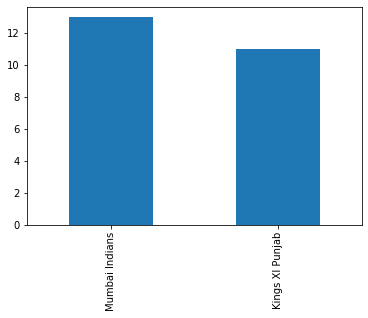

In [120]:
match['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 13 times and Punjab won 11 times against each other.

In [121]:
match['toss_winner'].value_counts()

Mumbai Indians     16
Kings XI Punjab     8
Name: toss_winner, dtype: int64

In [122]:
match['toss_decision'].value_counts()

field    15
bat       9
Name: toss_decision, dtype: int64

In [123]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Mumbai Indians     7
Kings XI Punjab    2
Name: winner, dtype: int64

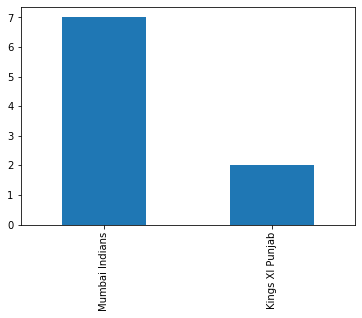

In [124]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Mumbai won the toss and won the match 7 times out of 16 times, whereas Punjab won 2 times. So winning toss doesn't have much affect to winning the match.

In [125]:
ids = list(match['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning     batting_team    bowling_team  over  ball   batsman  \
5055        22       1  Kings XI Punjab  Mumbai Indians     1     1   HM Amla   
5056        22       1  Kings XI Punjab  Mumbai Indians     1     2  SE Marsh   
5057        22       1  Kings XI Punjab  Mumbai Indians     1     3  SE Marsh   
5058        22       1  Kings XI Punjab  Mumbai Indians     1     4  SE Marsh   
5059        22       1  Kings XI Punjab  Mumbai Indians     1     5  SE Marsh   

     non_striker     bowler  is_super_over  ...  bye_runs  legbye_runs  \
5055    SE Marsh  HH Pandya              0  ...         0            0   
5056     HM Amla  HH Pandya              0  ...         0            0   
5057     HM Amla  HH Pandya              0  ...         0            0   
5058     HM Amla  HH Pandya              0  ...         0            0   
5059     HM Amla  HH Pandya              0  ...         0            0   

      noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
5055            0             0             1           0           1   
5056            0             0             0           0           0   
5057            0             0             4           0           4   
5058            0             0             0           0           0   
5059            0             0             1           0           1   

      player_dismissed dismissal_kind fielder  
5055               NaN            NaN     NaN  
5056               NaN            NaN     NaN  
5057               NaN            NaN     NaN  
5058               NaN            NaN     NaN  
5059               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Punjab.

In [126]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## to what type bowler Quinton De Kock will get out to:

In [127]:
delivery[(delivery['player_dismissed'] == 'Q de Kock') & (delivery['dismissal_kind'] != 'run out')]['bowler']

166772    Mohammed Shami
170509          R Ashwin
Name: bowler, dtype: object

So Q de Kock got out by 1 seam and 1 spin bowler when playing for Mumbai against Punjab.

In [128]:
df1[(df1['player_dismissed'] == 'Q de Kock') & (df1['dismissal_kind'] != 'run out')]['bowler'].value_counts()

MJ McClenaghan     3
YS Chahal          3
DL Chahar          2
AB Dinda           2
KV Sharma          2
AD Russell         2
R Ashwin           2
IC Pandey          1
MM Sharma          1
KH Pandya          1
SN Thakur          1
BB Sran            1
D Short            1
M Ali              1
P Kumar            1
PV Tambe           1
Kuldeep Yadav      1
Mohammed Shami     1
J Archer           1
MP Stoinis         1
P Krishna          1
MC Henriques       1
Harbhajan Singh    1
DJ Bravo           1
I Sharma           1
UT Yadav           1
SR Watson          1
DW Steyn           1
S Kaushik          1
S Gopal            1
DS Kulkarni        1
CJ Anderson        1
MA Starc           1
PP Chawla          1
S Kaul             1
SP Narine          1
Name: bowler, dtype: int64

De Kock got out by seamers 28 times and by spinners 17 times.

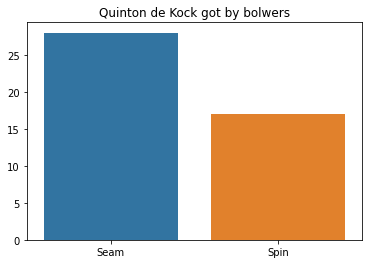

In [129]:
Kock_out = pd.Series([28,17],index=['Seam','Spin'])
sns.barplot(x = Kock_out.index, y = Kock_out)
plt.title('Quinton de Kock got by bolwers')
plt.show()

De Kock got out by seamers 28 times and by spinners 17 times.

## How many wickets KXIP will lose during powerplay:

In [130]:
total_wickets_Punjab = delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['over'] <= 6)]['player_dismissed'].count()
total_wickets_Punjab

28

Punjab lost 28 wickets in powerplay against Mumbai.

In [131]:
avg_wickets_Punajab = math.ceil(total_wickets_Punjab/len(ids))
avg_wickets_Punajab

2

Punjab lost 2 wickets in an avearge per match in powerplay against Mumbai.

In [132]:
total_wickets_batting_first = delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['over'] <= 6) & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_batting_first

18

Punjab lost 18 wickets in powerplay against Mumbai while batting first.

In [133]:
total_matches_batting_first_Punjab = len(delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Punjab

15

Total innings of Punjab batting first against Mumbai.

In [134]:
avg_wickets_Punjab_batting_first = math.ceil(total_wickets_batting_first/total_matches_batting_first_Punjab)
avg_wickets_Punjab_batting_first

2

Punjab lost 2 wickets in an avearge per match in powerplay against Mumbai while batting first.

In [135]:
total_wickets_batting_second = delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['over'] <= 6) & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second

10

Punjab lost 10 wickets in powerplay against Mumbai while batting second.

In [136]:
total_matches_batting_second_Punjab = len(delivery[(delivery['batting_team'] == 'Kings XI Punjab') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Punjab

9

Total innings of Punjab batting second against Mumbai.

In [137]:
avg_wickets_Punjab_batting_second = math.ceil(total_wickets_batting_second/total_matches_batting_second_Punjab)
avg_wickets_Punjab_batting_second

2

Punjab lost 2 wickets in an avearge per match in powerplay against Mumbai while batting second.

In [138]:
total_wickets_Punjab_overall = df1[(df1['batting_team'] == 'Kings XI Punjab') & (df1['over'] <= 6)]['player_dismissed'].count()
total_wickets_Punjab_overall

268

Punjab lost 268 wickets in powerplay overall.

In [139]:
Punjab_matches = df2[(df2['team1'] == 'Kings XI Punjab') | (df2['team2'] == 'Kings XI Punjab')]
total_ids_Punjab = list(Punjab_matches['id'])
avg_wickets_Punjab_overall = math.ceil(total_wickets_Punjab_overall/len(total_ids_Punjab))
avg_wickets_Punjab_overall

2

Punjab lost 2 wickets in an avearge per match in powerplay overall.

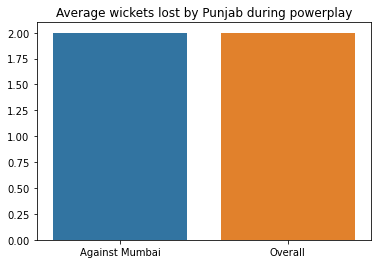

In [140]:
average_wickets_powerplay = pd.Series([avg_wickets_Punjab,avg_wickets_Punjab_overall],index = ['Against Mumbai','Overall'])
sns.barplot(x = average_wickets_powerplay.index , y = average_wickets_powerplay)
plt.title('Average wickets lost by Punjab during powerplay')
plt.show()

Punjab lost 2 wickets in an average per match overall and against Mumbai.

## How will KL Rahul get out:

In [141]:
total_dismissal_Rahul = delivery[delivery['player_dismissed'] == 'KL Rahul']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rahul

caught    100.0
Name: dismissal_kind, dtype: float64

KL Rahul always got out by caught against Mumbai.

In [142]:
total_dismissal_Rahul_overall = df1[df1['player_dismissed'] == 'KL Rahul']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rahul_overall

caught     63.829787
bowled     21.276596
lbw         8.510638
stumped     4.255319
run out     2.127660
Name: dismissal_kind, dtype: float64

KL Rahul always got out by caught 63% overall.

## Total how many wickets will fall:

In [143]:
total_wickets_fallen = delivery['player_dismissed'].count()
total_wickets_fallen

294

Total 294 wickets fallen in Mumbai vs Punjab match till now.

In [144]:
avg_wicket_fallen = math.ceil(total_wickets_fallen/len(ids))
avg_wicket_fallen

13

Total 13 wickets fallen in an average in a match between Mumbai and Punjab.

In [145]:
total_wickets_fallen_Mumbai = delivery[(delivery['batting_team'] == 'Mumbai Indians')]['player_dismissed'].count()
total_wickets_fallen_Mumbai

149

Total 149 wickets fallen of Mumbai against Punjab till now.

In [146]:
avg_wicket_fallen_Mumbai = math.ceil(total_wickets_fallen_Mumbai/len(ids))
avg_wicket_fallen_Mumbai

7

Mumbai lost 7 wickets in an average per match against Punjab.

In [147]:
total_wickets_fallen_Punjab = delivery[(delivery['batting_team'] == 'Kings XI Punjab')]['player_dismissed'].count()
total_wickets_fallen_Punjab

145

Total 145 wickets fallen of Punjab against Mumbai till now.

In [148]:
avg_wicket_fallen_Punjab = math.ceil(total_wickets_fallen_Punjab/len(ids))
avg_wicket_fallen_Punjab

7

Punjab lost 7 wickets in an average per match against Mumbai.

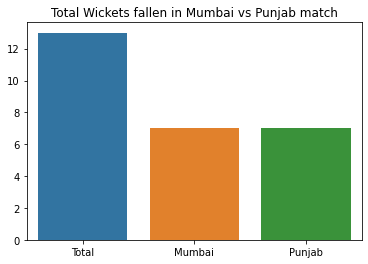

In [149]:
average_wickets = pd.Series([avg_wicket_fallen,avg_wicket_fallen_Mumbai,avg_wicket_fallen_Punjab], index=['Total','Mumbai','Punjab'])
sns.barplot(x = average_wickets.index, y = average_wickets)
plt.title('Total Wickets fallen in Mumbai vs Punjab match')
plt.show()

Mumbai and Punjab both lost 7 wickets in an average per match against each other.

## Dubai Ground Condition to some extend similar to Mumbai Home Ground so will consider Mumbai Home Ground:

In [150]:
match2.shape

(9, 18)

In [151]:
match2['winner'].value_counts()

Mumbai Indians     5
Kings XI Punjab    4
Name: winner, dtype: int64

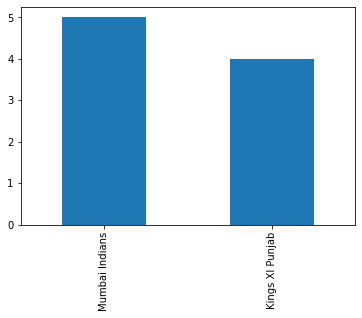

In [152]:
match2['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 5 times and Punjab won 4 times against each other at Mumbai home ground.

In [153]:
match2['toss_winner'].value_counts()

Mumbai Indians     5
Kings XI Punjab    4
Name: toss_winner, dtype: int64

In [154]:
match2['toss_decision'].value_counts()

bat      5
field    4
Name: toss_decision, dtype: int64

In [155]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Mumbai Indians     2
Kings XI Punjab    1
Name: winner, dtype: int64

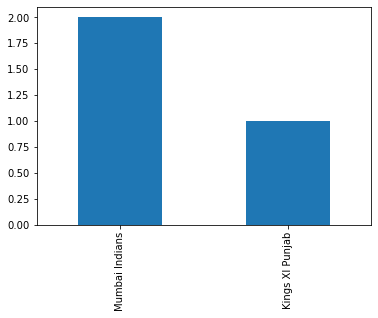

In [156]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 2 times after winning toss and Punjab only 1 time at Mumbai home ground. That means toss doesn't matter at Mumbai home ground.

In [157]:
ids1 = list(match2['id'])
delivery1 = df1[(df1['match_id'].isin(ids1))]
delivery1.head()

match_id  inning    batting_team     bowling_team  over  ball  \
50696       215       1  Mumbai Indians  Kings XI Punjab     1     1   
50697       215       1  Mumbai Indians  Kings XI Punjab     1     2   
50698       215       1  Mumbai Indians  Kings XI Punjab     1     3   
50699       215       1  Mumbai Indians  Kings XI Punjab     1     4   
50700       215       1  Mumbai Indians  Kings XI Punjab     1     5   

            batsman   non_striker bowler  is_super_over  ...  bye_runs  \
50696      S Dhawan  SR Tendulkar  B Lee              0  ...         0   
50697  SR Tendulkar      S Dhawan  B Lee              0  ...         0   
50698      S Dhawan  SR Tendulkar  B Lee              0  ...         0   
50699      S Dhawan  SR Tendulkar  B Lee              0  ...         0   
50700  SR Tendulkar      S Dhawan  B Lee              0  ...         0   

       legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
50696            0            0             0             1           0   
50697            0            0             0             1           0   
50698            0            0             0             0           0   
50699            0            0             0             1           0   
50700            0            0             0             2           0   

       total_runs  player_dismissed dismissal_kind fielder  
50696           1               NaN            NaN     NaN  
50697           1               NaN            NaN     NaN  
50698           0               NaN            NaN     NaN  
50699           1               NaN            NaN     NaN  
50700           2               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Punjab at Mumbai home ground.

## to what type bowler Quinton De Kock will get out to at Mumbai home ground:

In [158]:
delivery1[(delivery1['player_dismissed'] == 'Q de Kock') & (delivery1['dismissal_kind'] != 'run out')]['bowler']

166772    Mohammed Shami
Name: bowler, dtype: object

So Q de Kock got out by 1 seam bowler when playing for Mumbai against Punjab at Mumbai home ground.

In [159]:
ids2 = list(df2[df2['city'] == 'Mumbai']['id'].unique())
df1[(df1['player_dismissed'] == 'Q de Kock') & (df1['dismissal_kind'] != 'run out') & (df1['match_id'].isin(ids2))]['bowler'].value_counts()

I Sharma          1
MJ McClenaghan    1
DL Chahar         1
R Ashwin          1
J Archer          1
P Krishna         1
M Ali             1
Name: bowler, dtype: int64

De Kock got out by seamers 5 times and by spinners 2 times at Mumbai home ground overall.

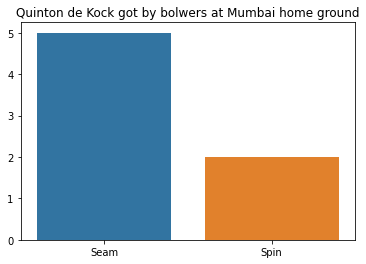

In [160]:
Kock_out = pd.Series([5,2],index=['Seam','Spin'])
sns.barplot(x = Kock_out.index, y = Kock_out)
plt.title('Quinton de Kock got by bolwers at Mumbai home ground')
plt.show()

De Kock got out by seamers 5 times and by spinners 2 times at Mumbai home ground.

## How many wickets KXIP will lose during powerplay at Mumbai home ground:

In [161]:
total_wickets_Punjab_Mumbai_home_ground = delivery1[(delivery1['batting_team'] == 'Kings XI Punjab') & (delivery1['over'] <= 6)]['player_dismissed'].count()
total_wickets_Punjab_Mumbai_home_ground

10

Punjab lost 10 wickets in powerplay against Mumbai at Mumbai home ground.

In [162]:
avg_wickets_Punjab_Mumbai_home_ground = math.ceil(total_wickets_Punjab_Mumbai_home_ground/len(ids1))
avg_wickets_Punjab_Mumbai_home_ground

2

Punjab lost 2 wickets in an avearge per match in powerplay against Mumbai at Mumbai home ground.

In [163]:
total_wickets_batting_second_Mumbai_home_ground = delivery1[(delivery1['batting_team'] == 'Kings XI Punjab') & (delivery1['over'] <= 6) & (delivery1['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second_Mumbai_home_ground

10

In [164]:
avg_wickets_Punjab_batting_second_Mumbai_home_ground = math.ceil(total_wickets_batting_second_Mumbai_home_ground/len(ids1))
avg_wickets_Punjab_batting_second_Mumbai_home_ground

2

Punjab lost 2 wickets in an avearge per match in powerplay against Mumbai while batting second at Mumbai home ground. Punjab didn't bat in first inning against Mumbai at Mumbai home ground.

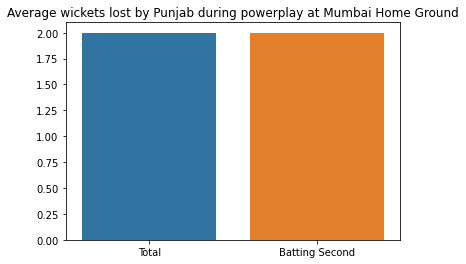

In [165]:
average_wickets_powerplay_Mumbai_home_ground = pd.Series([avg_wickets_Punjab_Mumbai_home_ground,avg_wickets_Punjab_batting_second_Mumbai_home_ground],index = ['Total','Batting Second'])
sns.barplot(x = average_wickets_powerplay_Mumbai_home_ground.index , y = average_wickets_powerplay_Mumbai_home_ground)
plt.title('Average wickets lost by Punjab during powerplay at Mumbai Home Ground')
plt.show()


Punjab lost 2 wickets in an average per match against Mumbai at Mumbai home ground.

## How will KL Rahul get out at Mumbai Home Ground:

In [166]:
total_dismissal_Rahul_Mumbai_home_ground = delivery1[delivery1['player_dismissed'] == 'KL Rahul']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rahul_Mumbai_home_ground

caught    100.0
Name: dismissal_kind, dtype: float64

KL Rahul always got out by caught against Mumbai at Mumbai home ground.

## Total Wickets fallen in a match at Mumbai home ground:

In [167]:
total_wickets_fallen_Mumbai_home_ground = delivery1['player_dismissed'].count()
total_wickets_fallen_Mumbai_home_ground

106

Total 106 wickets fallen in Mumbai vs Punjab match till now at Mumbai home ground.

In [168]:
avg_wicket_fallen_Mumbai_home_ground = math.ceil(total_wickets_fallen_Mumbai_home_ground/len(ids1))
avg_wicket_fallen_Mumbai_home_ground

12

Total 12 wickets fallen in an average in a match between Mumbai and Punjab at Mumbai home ground.

In [169]:
total_wickets_fallen_Mumbai_Mumbai_home_ground = delivery1[(delivery1['batting_team'] == 'Mumbai Indians')]['player_dismissed'].count()
total_wickets_fallen_Mumbai_Mumbai_home_ground

56

Total 56 wickets fallen of Mumbai against Punjab till now at Mumbai home ground.

In [170]:
avg_wicket_fallen_Mumbai_Mumbai_home_ground = math.ceil(total_wickets_fallen_Mumbai_Mumbai_home_ground/len(ids1))
avg_wicket_fallen_Mumbai_Mumbai_home_ground

7

Mumbai lost 7 wickets in an average per match against Punjab at Mumbai home ground.

In [171]:
total_wickets_fallen_Punjab_Mumbai_home_ground = delivery1[(delivery1['batting_team'] != 'Mumbai Indians')]['player_dismissed'].count()
total_wickets_fallen_Punjab_Mumbai_home_ground

50

Total 50 wickets fallen of Punjab against Mumbai till now at Mumbai home ground.

In [172]:
avg_wicket_fallen_Punjab_Mumbai_home_ground = math.ceil(total_wickets_fallen_Punjab_Mumbai_home_ground/len(ids1))
avg_wicket_fallen_Punjab_Mumbai_home_ground

6

Punjab lost 6 wickets in an average per match against Mumbai at Mumbai home ground.

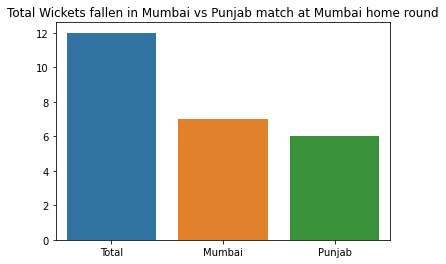

In [173]:
average_wickets_Mumbai_home_ground = pd.Series([avg_wicket_fallen_Mumbai_home_ground,avg_wicket_fallen_Mumbai_Mumbai_home_ground,avg_wicket_fallen_Punjab_Mumbai_home_ground], index=['Total','Mumbai','Punjab'])
sns.barplot(x = average_wickets_Mumbai_home_ground.index, y = average_wickets_Mumbai_home_ground)
plt.title('Total Wickets fallen in Mumbai vs Punjab match at Mumbai home round')
plt.show()

Mumbai lost 7 wickets in an average per match whereas Punjab lost 6 wickets in an average per match against each other at Mumbai home ground.